In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [7]:
sizes = [10, 10, 10]
probs = [[0.5, 0.02, 0.02], [0.02, 0.5, 0.02], [0.02, 0.02, 0.5]]
G = nx.stochastic_block_model(sizes, probs, seed=212)

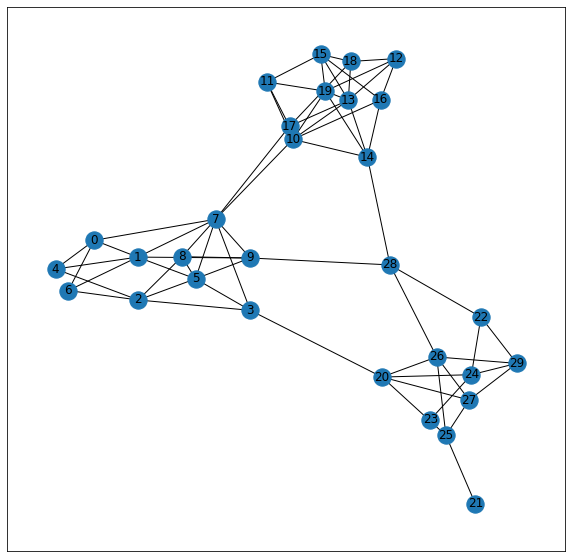

In [8]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G, with_labels=True)

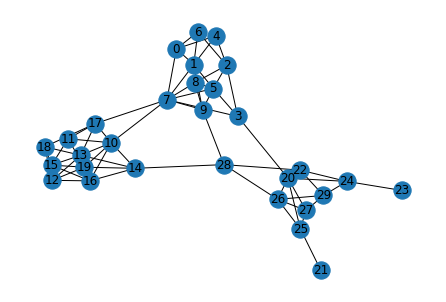

In [9]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

In [14]:
import pandas as pd
import numpy as np
posdf = pd.DataFrame.from_dict(pos, orient='index', columns=['X', 'Y'])
# posdf.head()
posar = posdf.values
print(posar)

[[-0.10375971  0.5891343 ]
 [-0.01890738  0.49099367]
 [ 0.14203269  0.48669168]
 [ 0.19656857  0.1679385 ]
 [ 0.08946464  0.67091564]
 [ 0.07686327  0.34175533]
 [ 0.00153584  0.69532857]
 [-0.15002704  0.27205853]
 [-0.01278275  0.37868662]
 [ 0.02444349  0.20998262]
 [-0.42308949  0.00386563]
 [-0.63443128  0.02841339]
 [-0.71198503 -0.2305674 ]
 [-0.57236879 -0.07421502]
 [-0.30645954 -0.1555377 ]
 [-0.71534475 -0.135576  ]
 [-0.52797202 -0.23369799]
 [-0.50052252  0.12349572]
 [-0.74909651 -0.02149747]
 [-0.55531555 -0.148628  ]
 [ 0.44267244 -0.21676261]
 [ 0.60240474 -0.78812562]
 [ 0.50238208 -0.16671204]
 [ 1.         -0.29340042]
 [ 0.73079122 -0.23717961]
 [ 0.50339003 -0.53283425]
 [ 0.39208319 -0.34892574]
 [ 0.5311781  -0.4183437 ]
 [ 0.12944671 -0.13258346]
 [ 0.61680534 -0.32467318]]


In [17]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=3)
model.fit(posar)
yhat = model.predict(posar)


In [18]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

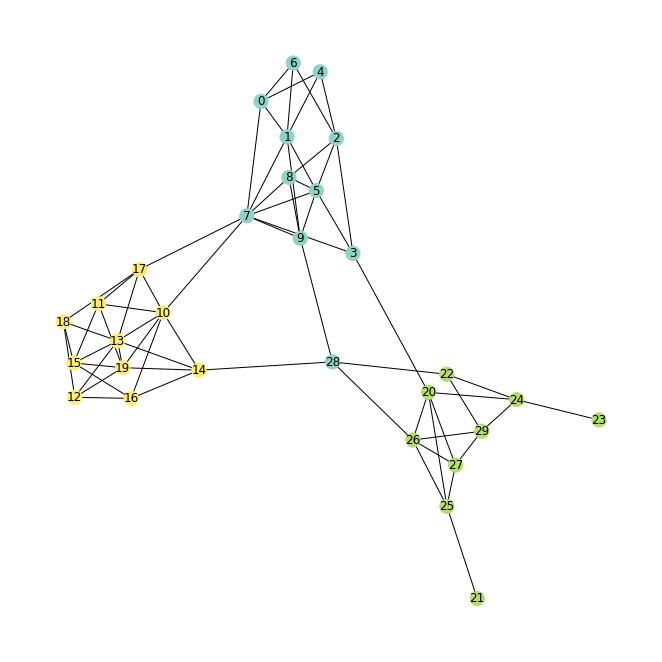

In [19]:
plt.figure(figsize=(9,9))
nx.draw(G, pos, node_color=yhat, cmap=plt.cm.Set3, with_labels=True, node_size=200)
plt.show()

In [20]:
def cluster_from_positions(G, pos, n_clusters):
    posdf = pd.DataFrame.from_dict(pos, orient='index', columns=['X', 'Y'])
    posar = posdf.values
    model = Birch(threshold=0.01, n_clusters=n_clusters)
    model.fit(posar)
    yhat = model.predict(posar)
    plt.figure(figsize=(9,9))
    nx.draw(G, pos, node_color=yhat, cmap=plt.cm.Set3, with_labels=True, node_size=200)
    plt.show()

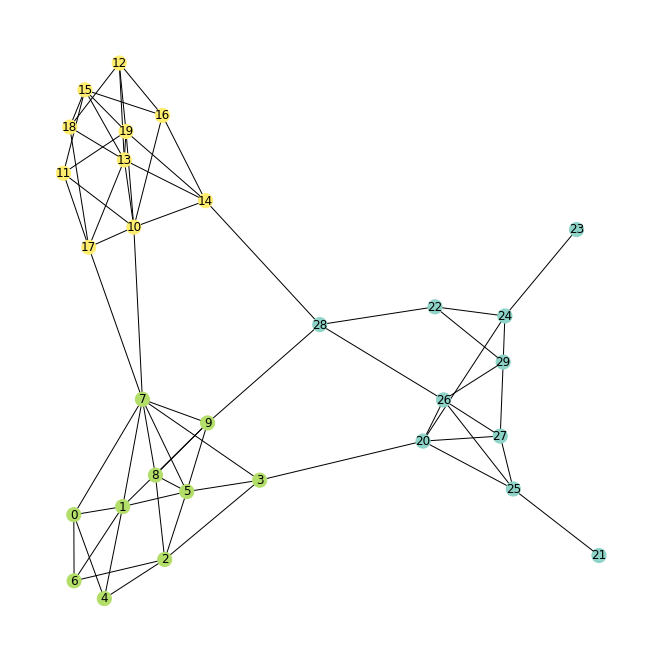

In [21]:
pos=nx.spring_layout(G)
cluster_from_positions(G, pos, 3)

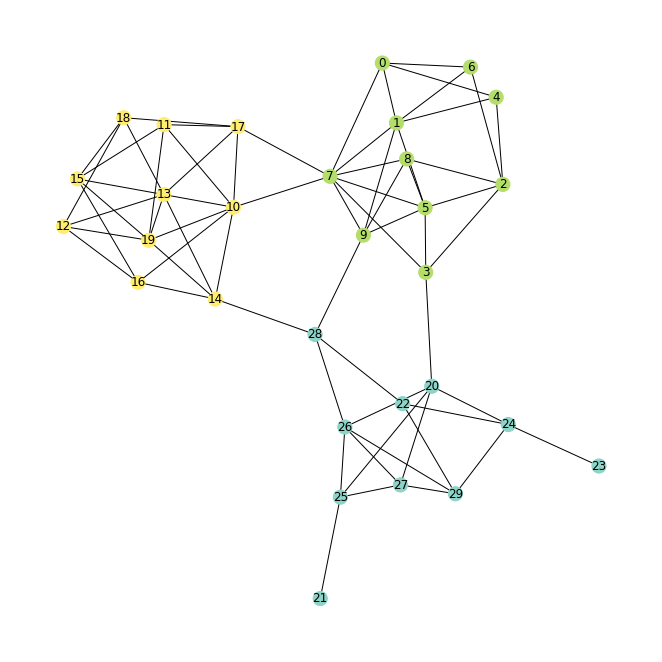

In [22]:
pos=nx.kamada_kawai_layout(G)
cluster_from_positions(G, pos, 3)

In [23]:
sizes = [10, 10, 10]
probs = [[0.4, 0.05, 0.05], [0.05, 0.5, 0.05], [0.05, 0.05, 0.2]]
G = nx.stochastic_block_model(sizes, probs, seed=212)

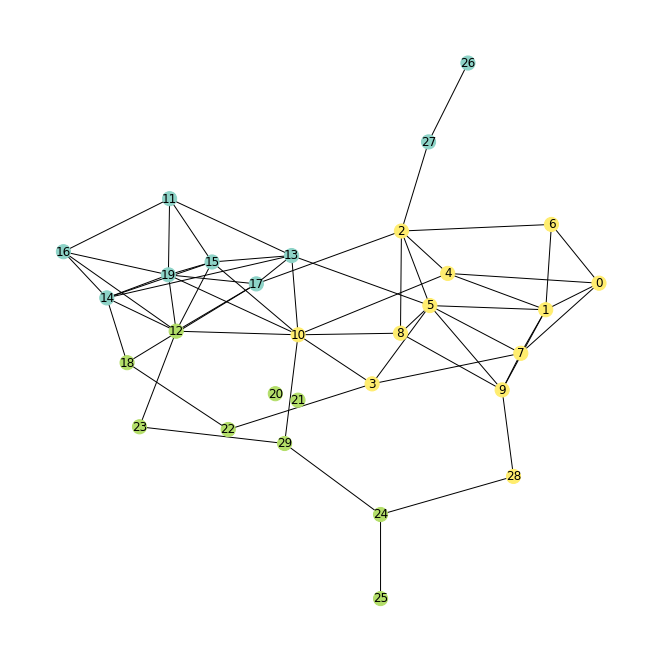

In [24]:
pos=nx.kamada_kawai_layout(G)
cluster_from_positions(G, pos, 3)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
yhat = model.fit_predict(X)